## BYTE PANACHE COMPETITION

Name: Sanjana Naga Chebiyyam

Roll no: fmml20210347

### Working on automobile dataset

### Importing libraries

In [ ]:
import numpy as np
from sklearn import linear_model,metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

### Uploading the datasets

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Automobile_data.csv to Automobile_data (1).csv


In [ ]:
df = pd.read_csv("Automobile_data.csv")
print(len(df))
df.head()

205


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Data Visualization

Box Plot:- This is the type of plot that can be used to obtain more of the statistical details about the data. Points outside are called as outliers.
The box plot gives us a representation of 25th, 50th ,75th quartiles

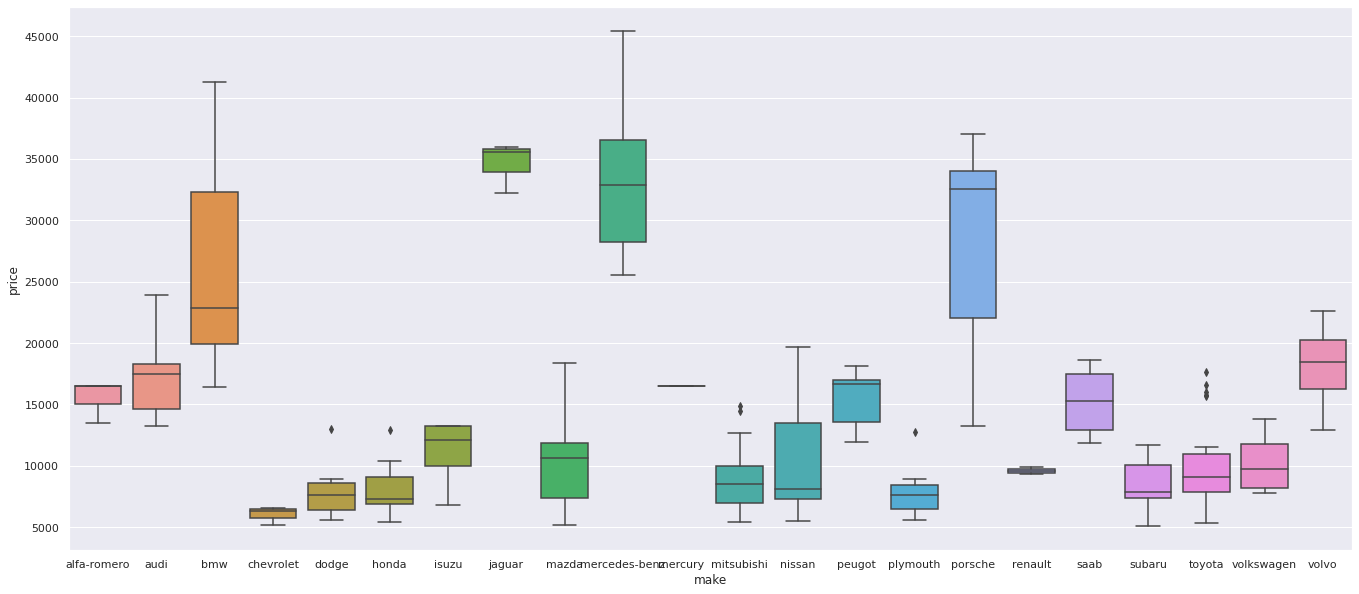

In [ ]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=df)

Violin plots:- can be inferred as a combination of Box plot at the middle and distribution plots (Kernel Density Estimation) on both side of the data.

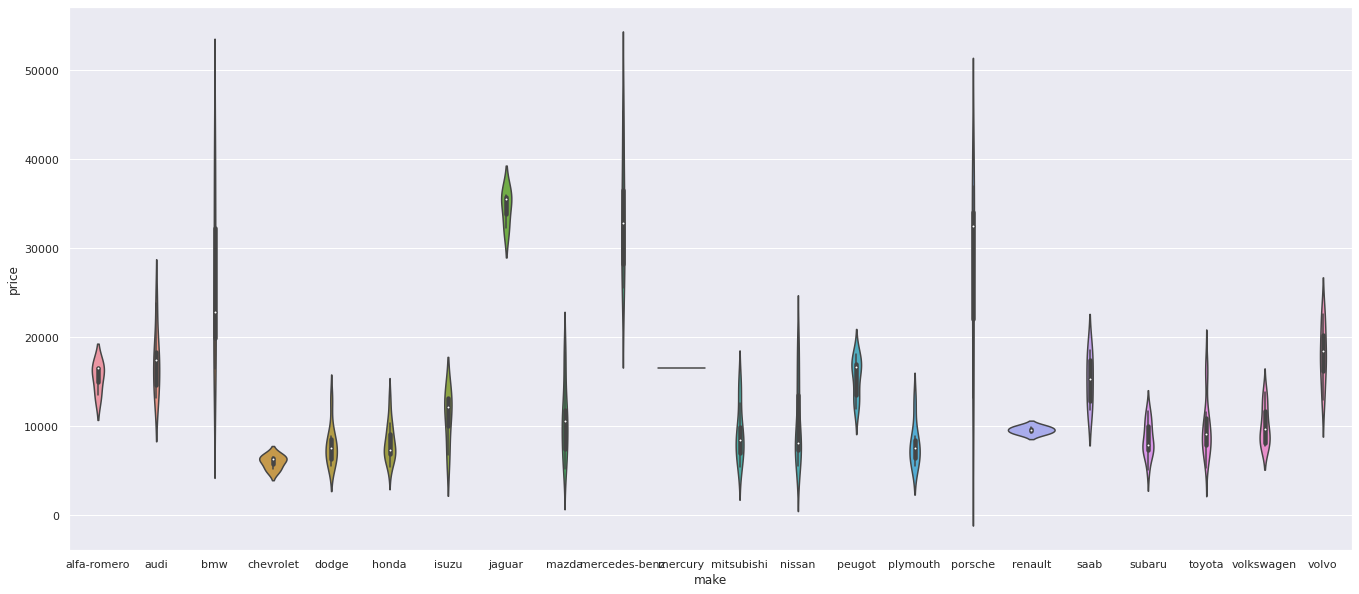

In [ ]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.violinplot(x="make", y="price", data=df)

Scatter plot

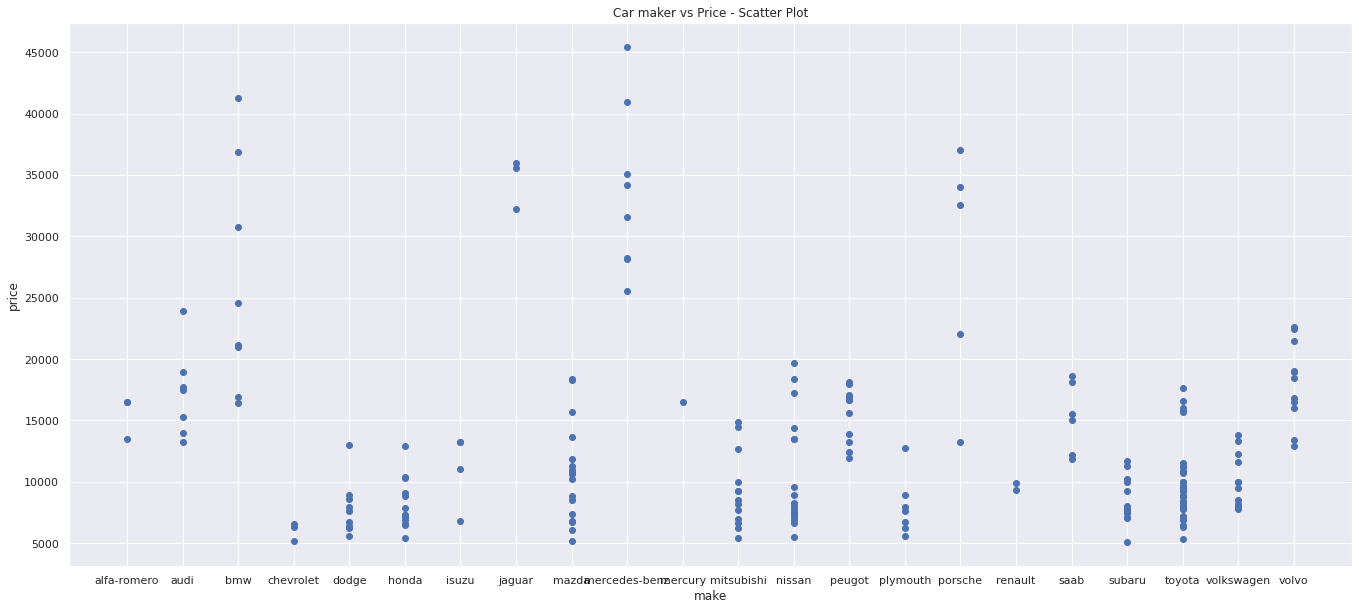

In [ ]:
plt.scatter(df['make'],df['price'])
plt.xlabel('make')
plt.ylabel('price');
plt.title('Car maker vs Price - Scatter Plot')
plt.show()

Jointplot:- the jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins.

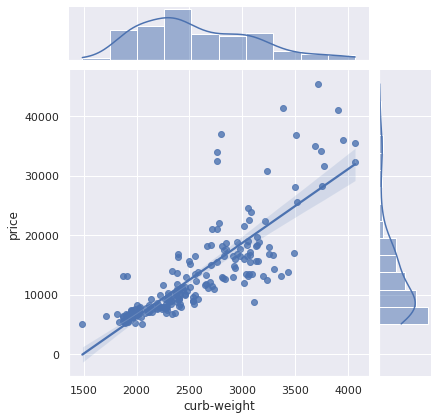

In [ ]:
sns.jointplot(data=df, x="curb-weight", y="price", kind="reg")

### Cleaning of the data

Find out if there are null fields:

In [ ]:
df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Cleaning the price data:

In [ ]:
# List out the values which are not numeric
df['price'].loc[df['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [ ]:
#Setting the missing value to mean of price and convert the datatype to integer
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

Correlation matrix:

The heatmap is used to see the correlation.All the above features are continuous. If with increase in one feature other also increases then it means it is positively correlated. If one increase other decrease then negatively correlated. no relation or no trend then zero correlation.

If compare the two same features then the correlation =1. say if correlation is -0.2 the it means features are negatively related , but the value is insignificant. For prediction we choose those features which are highly correlated. So we use only these features with more correlation to predict the unknown

Considering Price as the target variable. We have to predict Price using other features.

we have to determine the best fit line which gives the relation between the other features and the target feature and also minimize the MSE mean square error which is the distance between the actual value and the predicted value.



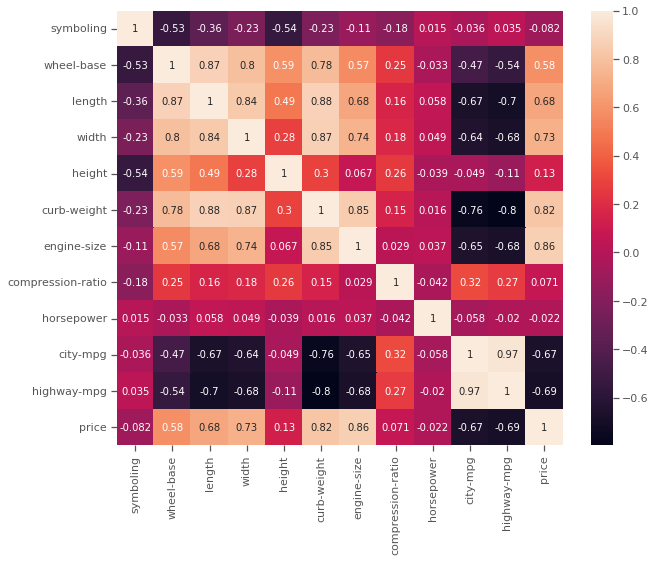

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(data=correlation_matrix, annot=True)

Here the Price is highly correlated with engine-size(0.86), curb-weight(0.82).

So, we'll pick those as the features with which we train our regression model.

price and engine size are positively correlated

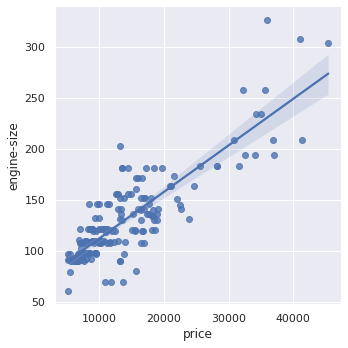

In [ ]:
g = sns.lmplot('price',"engine-size", df);

an example for negative correlation

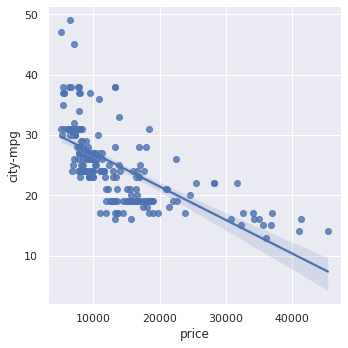

In [ ]:
g = sns.lmplot('price',"city-mpg", df);

So using these two features and predicting the target variable

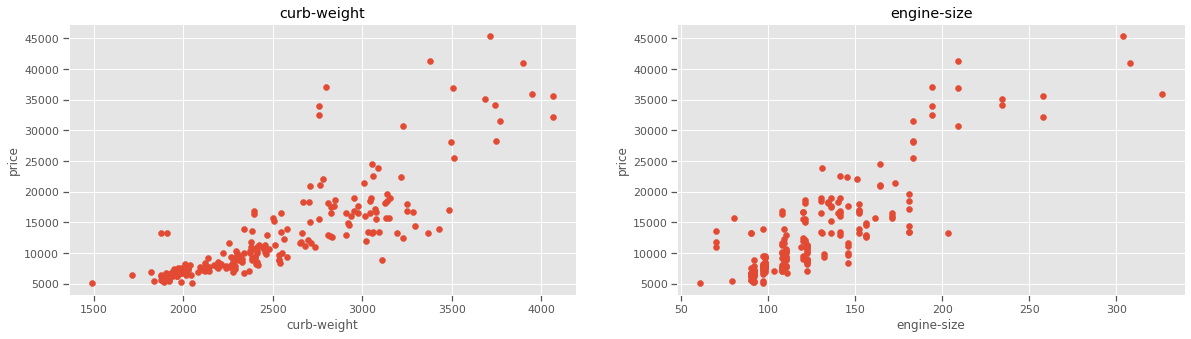

In [ ]:
plt.figure(figsize=(20, 5))

features = ['curb-weight', 'engine-size']
target = df['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    house_features = df[col]
    target_price = target
    plt.scatter(house_features, target_price, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')

In [ ]:
x_ex = pd.DataFrame(np.c_[df['curb-weight'], df['engine-size']], columns = ['curb-weight','engine-size'])
y_ex = df['price']

x_ex_train, x_ex_test, y_ex_train, y_ex_test = train_test_split(x_ex, y_ex, test_size = 0.2, random_state=5)

lin_model = linear_model.LinearRegression()
lin_model.fit(x_ex_train, y_ex_train)

LinearRegression()

In [ ]:
y_ex_train_predict = lin_model.predict(x_ex_train)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_train, y_ex_train_predict)))
r2 = metrics.r2_score(y_ex_train, y_ex_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}\n'.format(rmse))

y_ex_test_predict = lin_model.predict(x_ex_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_test, y_ex_test_predict)))
r2 = metrics.r2_score(y_ex_test, y_ex_test_predict)

print("Model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
RMSE is 3896.9336818182987

Model performance for testing set
--------------------------------------
RMSE is 3213.662779519268


In [ ]:
r2 = metrics.r2_score(y_ex_test, y_ex_test_predict)
print(r2)

0.8488225065662823


R2 score and RMSE are use to evaluate the performance a regression based model. It works by measuring the amount of variance in the predictions explained by the dataset. Here we got a r2 score of 0.84 which is not bad.

If the value of the r squared score is 1, it means that the model is perfect and if its value is 0, it means that the model will perform badly on an unseen dataset.

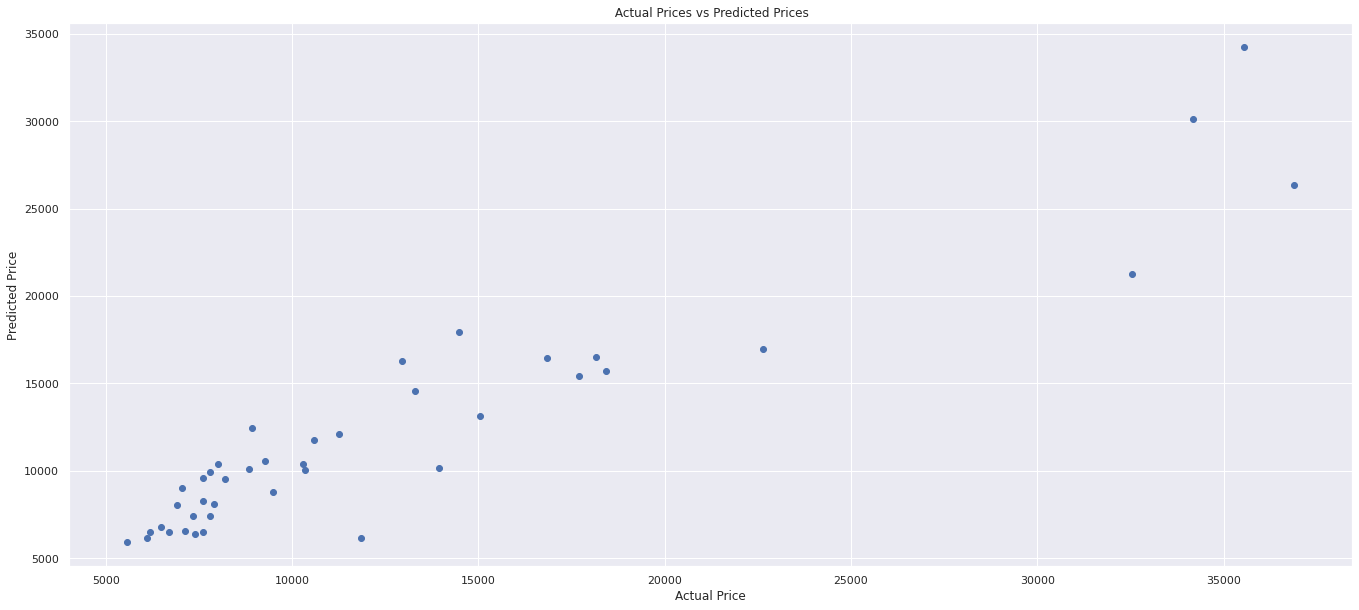

In [ ]:
plt.scatter(y_ex_test, y_ex_test_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()



---


linear regression in single variable: y= mx + c

linear regression in multivariable: y= m1x1 + m2x2 +c

a second degree polynomial is y= ax^2 + bx +c

if x1 is substituted by x^2 and x2 = x and m1 =a and m2=b and c=c in 2nd equation, we can fit 2nd degree polynomial

like this we can fit any curve of any degree.

